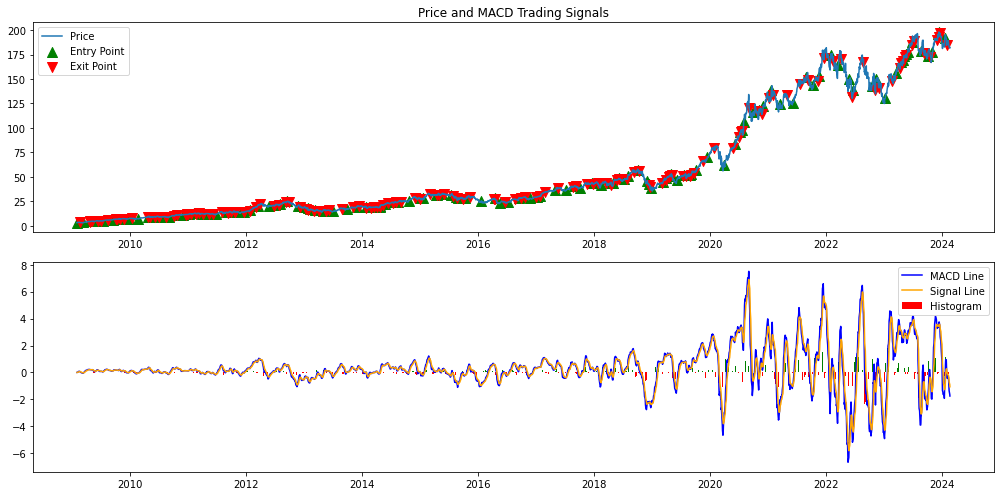

In [90]:
import pandas as pd

# Load the data
file_path = '/Users/kevinwang/Desktop/stocks/Apple Inc.(AAPL)..xlsx'
df = pd.read_excel(file_path)
df = df.iloc[::-1]
# Display the first few rows of the dataframe to understand its structure
df.head()
import numpy as np
import matplotlib.pyplot as plt

# Calculate the Exponential Moving Averages for the MACD line and Signal line
df['EMA_12'] = df['Last Price'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Last Price'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Determine the crossing points
df['Crossover'] = np.where(df['MACD'] > df['Signal_Line'], 1, 0)
df['Crossunder'] = np.where(df['MACD'] < df['Signal_Line'], 1, 0)
df['Entry_Point'] = df['Crossover'].diff() > 0
df['Exit_Point'] = df['Crossunder'].diff() > 0

# Plotting
plt.figure(figsize=(14, 7))

# Price
plt.subplot(211)
plt.plot(df['Date'], df['Last Price'], label='Price')
plt.scatter(df[df['Entry_Point']]['Date'], df[df['Entry_Point']]['Last Price'], label='Entry Point', color='green', marker='^', s=100)
plt.scatter(df[df['Exit_Point']]['Date'], df[df['Exit_Point']]['Last Price'], label='Exit Point', color='red', marker='v', s=100)
plt.title('Price and MACD Trading Signals')
plt.legend()

# MACD and Signal Line
plt.subplot(212)
plt.plot(df['Date'], df['MACD'], label='MACD Line', color='blue')
plt.plot(df['Date'], df['Signal_Line'], label='Signal Line', color='orange')
plt.bar(df['Date'], df['MACD'] - df['Signal_Line'], width=0.5, label='Histogram', color=np.where(df['MACD'] - df['Signal_Line'] > 0, 'green', 'red'))
plt.legend()

plt.tight_layout()
plt.show()


In [91]:
df['signal'] = np.where(df['Entry_Point'] == True, 1, 0)

In [92]:
# Calculate daily returns
df['daily_return'] = df['Last Price'].pct_change()

df['strategy_return'] = df['daily_return'] * df['signal'].shift()

# Cumulative returns
df['cumulative_strategy_return'] = (1 + df['strategy_return']).cumprod()
df['cumulative_market_return'] = (1 + df['daily_return']).cumprod()

#days_in_year = 252
sharpe_ratio = (df['strategy_return'].mean() / df['strategy_return'].std()) * np.sqrt(days_in_year)

# Max Drawdown
rolling_max = df['cumulative_strategy_return'].cummax()
daily_drawdown = df['cumulative_strategy_return']/rolling_max - 1.0
max_drawdown = daily_drawdown.min()

# Average Win and Loss
average_win = df[df['strategy_return'] > 0]['strategy_return'].mean()
average_loss = df[df['strategy_return'] < 0]['strategy_return'].mean()

# Buy and Hold Return
buy_and_hold_return = (df['Last Price'].iloc[-1] - df['Last Price'].iloc[0])/df['Last Price'].iloc[0]
# Strategy Return
strategy_return = df['cumulative_strategy_return'].iloc[-1] - 1

{
    "sharpe_ratio": round(sharpe_ratio, 2),
    "cumulative_strategy_return": round(strategy_return,2),
    "max_drawdown": round(max_drawdown,2),
    "average_win": round(average_win,2),
    "average_loss": round(average_loss,2),
    "buy_and_hold": round(buy_and_hold_return,2)
}

{'sharpe_ratio': 0.44,
 'cumulative_strategy_return': 0.39,
 'max_drawdown': -0.13,
 'average_win': 0.01,
 'average_loss': -0.01,
 'buy_and_hold': 55.64}